# Studi Kasus EDA
Dataset yang digunakan adalah netflix dataset.


The resource of dataset is from [kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)


In [54]:
#pip install plotly 
#Download this module to help visualization

In [41]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import plotly as py
import plotly.graph_objs as go

In [11]:
data = pd.read_csv("../Dataset/netflix_titles.csv")
B, K = data.shape
print('Baris = ', B, 'dan', 'Kolom = ', K)

Baris =  8807 dan Kolom =  12


In [12]:
#melihat 5 data pertama 
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
#mengubah tipe data untuk variabel yang ingin diubah tipe datanya
data['type'] = data['type'].astype('category')
data['rating'] = data['rating'].astype('category')
data['date_added'] = data['date_added'].astype('datetime64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 706.2+ KB


In [21]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
# Mengganti nilai \n (kosong) pada variabel country dengan nilai NaN
data[['country']] = data[['country']].replace('\n', np.nan)

In [24]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [25]:
#Menghapus semua baris yang memiliki missing values

#Karena tidak memungkinkan melakukan proses imputasi
data.dropna(inplace=True)

In [26]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
data.duplicated().sum()

0

In [55]:
data.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,False,False,False,False,False,False,False,False,False,False,False,False
8802,False,False,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5332,5332,5332,5332,5332,5332,5332,5332.000000,5332,5332,5332,5332
unique,5332,2,5332,3945,5200,604,1450,NaN,14,198,335,5321
top,s8,Movie,Sankofa,"Raúl Campos, Jan Suter",Samuel West,United States,2020-01-01 00:00:00,NaN,TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...
freq,1,5185,1,18,10,1846,92,NaN,1822,135,336,2
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.742123,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.625831,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN


Berdasarkan perhitungan statistik sederhana diseluruh variabel. Diperolah dari data sejumlah 5332 terdapat 2 tipe video yang disediakan oleh netflix, 5332 judul gabungan dari judul film maupun judul TV show, dan 604 yang memproduksinya.

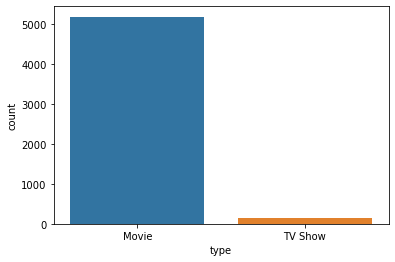

In [30]:
s = sns.countplot(x = 'type', data = data)

Diperoleh dari diagram diatas bahwa tipe video lebih banyak dalam bentuk film dibandingkan TV Show.

Text(0.5, 1.0, 'Top 5 Country Produce TV Show or Movie')

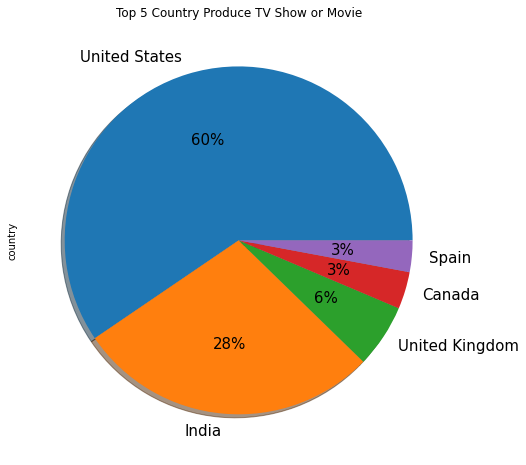

In [35]:
country = data.groupby(data['country'])['country'] \
                       .count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
country.plot.pie(autopct = "%1.f%%",
                shadow = True, 
                fontsize = 15)
plt.title("Top 5 Country Produce TV Show or Movie")

Dilihat dari diagram **Top 5 Country Produce TV Show or Movie**, diperoleh oleh negara **United State** unggul sebesar **60%**, diikuti dengan negara **india** sebesar **28%**, **UK** sebesar **6%**, **canada** dan **spain** sebesar **3%** 

In [49]:
x = data.groupby(['type'])['type'].count()
y = len(data)

r = ((x/y).round(2))

rasio = pd.DataFrame(r).T

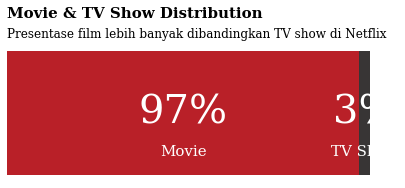

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

ax.barh(rasio.index, rasio['Movie'],
        color = '#b20710', alpha=0.9,
        label='Male')

ax.barh(rasio.index, rasio['TV Show'],
        left=rasio['Movie'], color='#221f1f',
        alpha=0.9, label='Female')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])

for i in rasio.index:
    ax.annotate(f"{int(rasio['Movie'][i]*100)}%",
                xy=(rasio['Movie'][i]/2, i),
                va='center', ha='center', fontsize=40, 
                    fontweight='light', fontfamily='serif',
                    color='white')

    ax.annotate("Movie",
                xy=(rasio['Movie'][i]/2, -0.25),
                va='center', ha='center', fontsize=15, 
                    fontweight='light', fontfamily='serif',
                    color='white')

for i in rasio.index:
    ax.annotate(f"{int(rasio['TV Show'][i]*100)}%", 
                   xy=(rasio['Movie'][i]+rasio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, 
                   fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(rasio['Movie'][i]+rasio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, 
                   fontweight='light', fontfamily='serif',
                   color='white') 
                    
fig.text(0.125, 1.03, 'Movie & TV Show Distribution',
        fontfamily='serif', fontsize=15, fontweight='bold')

fig.text(0.125, 0.92, "Presentase film lebih banyak dibandingkan TV show di Netflix",
        fontfamily='serif', fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


ax.legend().set_visible(False)
plt.show()